<a href="https://colab.research.google.com/github/brit228/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [2]:
def mean(vals):
  total = 0
  for v in vals:
    total += v
  return total / len(vals)

def variance(vals, pop=False):
  m = mean(vals)
  total = 0
  for v in vals:
    total += (v - m)**2
  r = 0
  if pop:
    r = 1
  return total / (len(vals) - r)

def std_dev(vals, pop=False):
  return variance(vals, pop)**0.5

def covariance(X, Y):
  if len(X) == len(Y):
    m_x = mean(X)
    m_y = mean(Y)
    total = 0
    for i in range(len(X)):
      total += (X[i] - m_x)*(Y[i] - m_y)
    return total / (len(X) - 1)
  return None

def correlation(X,Y):
  if len(X) == len(Y):
    return covariance(X,Y) / (std_dev(X, True) * std_dev(Y, True))
  return None

sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
print(mean(sales))
print(variance(sales, True))
print(std_dev(sales, True))

3052.714285714286
214387.90476190473
463.0204150595357


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [3]:
import numpy as np

cust = [127, 80, 105, 92, 120, 115, 93]
vals = np.array([sales, cust])
print(np.cov(vals)[0,1])

print(covariance(sales, cust))

7604.357142857142
7604.357142857142


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [4]:
print(std_dev(cust, True))
print(correlation(sales, cust))
print(np.corrcoef(sales, cust)[0,1])

17.057326313123664
0.9628339778148909
0.9628339778148909


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [5]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv", header=0)

t_num = []
for t in df:
  if df[t].dtype in ['int64', 'float64'] and t not in ["Unnamed: 0"]:
    t_num.append(t)
for i in range(len(t_num)-1):
  for j in range(i+1, len(t_num)):
    t_df = df.dropna(subset=[t_num[i], t_num[j]])
    vals = np.array([t_df[t_num[i]], t_df[t_num[j]]])
    cov = np.cov(vals)
    cof = np.corrcoef(vals)
    print("{} vs {}".format(t_num[i], t_num[j]))
    print("Covariance:")
    print(cov)
    print()
    print("Correlation Coefficient:")
    print(cof)
    print()
    print()

pclass vs survived
Covariance:
[[ 0.70196919 -0.12724831]
 [-0.12724831  0.23624963]]

Correlation Coefficient:
[[ 1.         -0.31246936]
 [-0.31246936  1.        ]]


pclass vs age
Covariance:
[[  0.70196919  -3.95460466]
 [ -3.95460466 165.97681759]]

Correlation Coefficient:
[[ 1.         -0.36637036]
 [-0.36637036  1.        ]]


pclass vs sibsp
Covariance:
[[0.70196919 0.05309046]
 [0.05309046 1.0850522 ]]

Correlation Coefficient:
[[1.         0.06083201]
 [0.06083201 1.        ]]


pclass vs parch
Covariance:
[[0.70196919 0.01328722]
 [0.01328722 0.74919459]]

Correlation Coefficient:
[[1.        0.0183222]
 [0.0183222 1.       ]]


pclass vs fare
Covariance:
[[ 7.02125581e-01 -2.42277878e+01]
 [-2.42277878e+01  2.67895974e+03]]

Correlation Coefficient:
[[ 1.         -0.55862873]
 [-0.55862873  1.        ]]


pclass vs body
Covariance:
[[ 7.22451791e-01 -2.87665289e+00]
 [-2.87665289e+00  9.54468857e+03]]

Correlation Coefficient:
[[ 1.         -0.03464194]
 [-0.03464194  1.  

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

Dot product:  0


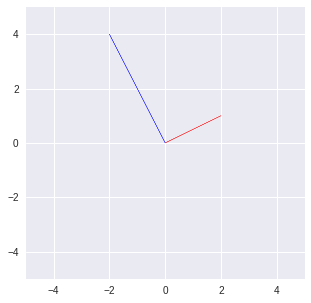

In [6]:
v1 = np.array([2, 1])
v2 = np.array([-2, 4])
print("Dot product: ", np.dot(v1,v2))

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.arrow(0,0,v1[0],v1[1],color='r')
ax.arrow(0,0,v2[0],v2[1],color='b')
ax.set_xlim([-5.0, 5.0])
ax.set_ylim([-5.0, 5.0])
plt.show()

# Orthoginal == Perpendicular

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [7]:
a = np.array([-5,3,7])
b = np.array([6,-8,2])
np.dot(a,b)

# No, dot product finds the cosine of the angle between a and b, and because cos(90) = 0 and the dot product is not 0, a and b are not orthoginal

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [8]:
c = np.array([2,-15,6,20])
print("||c||^2: ", np.linalg.norm(c)**2)
print("c dot c: ", np.dot(c,c))
c = np.matrix([[2,-15,6,20]])
print("c c_T: ", c*c.T)

# All same amount as essentially the same calulation in this case

||c||^2:  665.0
c dot c:  665
c c_T:  [[665]]


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
= 7 \begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12 \begin{bmatrix} 0 \\ 1 \end{bmatrix}
\\
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
= 2 \begin{bmatrix} 1 \\ 0 \\ 0  \end{bmatrix} + 11 \begin{bmatrix} 0 \\ 1 \\ 0  \end{bmatrix} - 8 \begin{bmatrix} 0 \\ 0 \\ 1  \end{bmatrix}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [9]:
f = np.array([4,12,11,9,2])
l = np.linalg.norm(f)
print("f (unit vector): ", f / l)

f (unit vector):  [0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

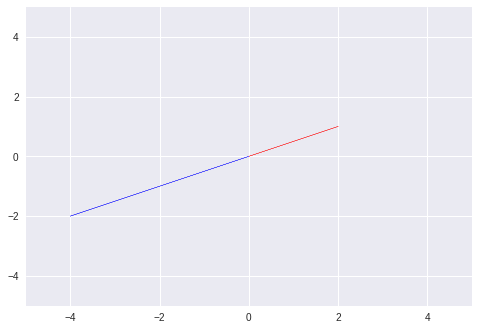

In [10]:
v1 = np.array([2, 1])
v2 = -2 * v1

fig = plt.figure()
ax = fig.add_subplot(111)
ax.arrow(0,0,v1[0],v1[1],color='r')
ax.arrow(0,0,v2[0],v2[1],color='b')
ax.set_xlim([-5.0, 5.0])
ax.set_ylim([-5.0, 5.0])
plt.show()

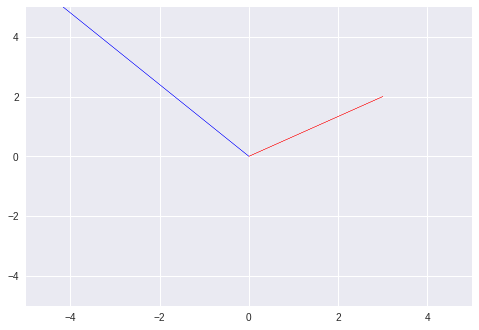

In [11]:
v1 = np.array([3, 2])
v2 = np.array([-5, 6])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.arrow(0,0,v1[0],v1[1],color='r')
ax.arrow(0,0,v2[0],v2[1],color='b')
ax.set_xlim([-5.0, 5.0])
ax.set_ylim([-5.0, 5.0])
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



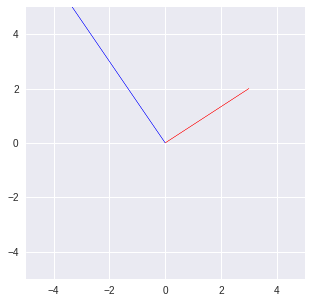

In [12]:
v1 = np.array([3, 2])
v2 = np.array([-4, 6])

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.arrow(0,0,v1[0],v1[1],color='r')
ax.arrow(0,0,v2[0],v2[1],color='b')
ax.set_xlim([-5.0, 5.0])
ax.set_ylim([-5.0, 5.0])
plt.show()

## 6.2 What does it mean to form a basis?

It means that these vectors can be combined together linearly to create any vector for the n dimensions of the vectors. These vectors also have to be linearly independent of each other.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

### 1. Swap rows 1 and 2

\begin{align}
P = \begin{bmatrix} 
-1 & 0 & 7 \\
1 & 2 & 3 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

### 2. Multiply row 1 by -1, row 2 by 2, and row 3 by 1/2

\begin{align}
P = \begin{bmatrix} 
1 & 0 & -7 \\
2 & 4 & 6 \\
2 & 4  & 1
\end{bmatrix}
\end{align}

### 3. Subtract row 3 from row 2

\begin{align}
P = \begin{bmatrix} 
1 & 0 & -7 \\
0 & 0 & 5 \\
2 & 4  & 1
\end{bmatrix}
\end{align}

### 4. Multiply row 2 by 1/5

\begin{align}
P = \begin{bmatrix} 
1 & 0 & -7 \\
0 & 0 & 1 \\
2 & 4  & 1
\end{bmatrix}
\end{align}

### 5. Add 7 times row 2 to row 1

\begin{align}
P = \begin{bmatrix} 
1 & 0 & 0 \\
0 & 0 & 1 \\
2 & 4  & 1
\end{bmatrix}
\end{align}

### 6. Subtract row 2 and 2 times row 1 from row 3

\begin{align}
P = \begin{bmatrix} 
1 & 0 & 0 \\
0 & 0 & 1 \\
0 & 4  & 0
\end{bmatrix}
\end{align}

### 7. Multiply row 3 by 1/4

\begin{align}
P = \begin{bmatrix} 
1 & 0 & 0 \\
0 & 0 & 1 \\
0 & 1  & 0
\end{bmatrix}
\end{align}

### 8. Swap rows 2 and 3

\begin{align}
P = \begin{bmatrix} 
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0  & 1
\end{bmatrix}
\end{align}

### P spans $\mathbb{R}^3$

## 7.2 What does the rank of a matrix tell us?

The rank of the matrix tells us how much real space the matrix can span. The rank means the number of unit vectors whose linear combinations can describe all of the columns in the matrix.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

[0.5 1.5]


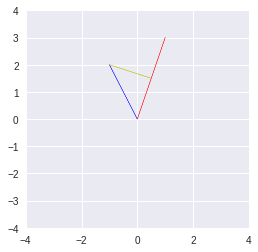

In [13]:
v = np.array([1,3])
w = np.array([-1,2])

proj_l = np.dot(w,v) * v / np.dot(v,v)
print(proj_l)

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.arrow(0,0,v[0],v[1],color='r')
ax.arrow(0,0,w[0],w[1],color='b')
ax.arrow(proj_l[0],proj_l[1],w[0]-proj_l[0],w[1]-proj_l[1],color='y')
ax.set_xlim([-4.0, 4.0])
ax.set_ylim([-4.0, 4.0])
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

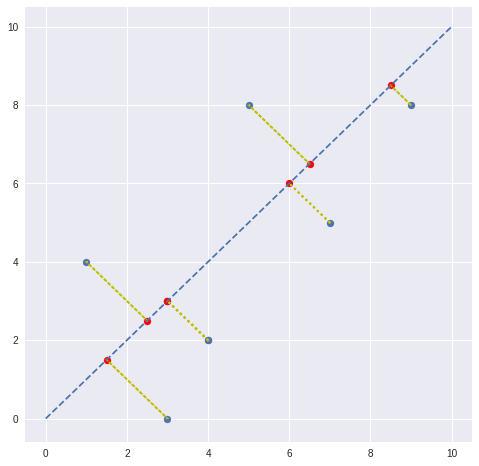

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

def proj_l(v,w):
  proj_l = np.dot(w,v) * v / np.dot(v,v)
  return [proj_l, w - proj_l]

v = np.array([1,1])

x_n = []
y_n = []

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.plot([0,10],[0,10],"--")
ax.scatter(x_values,y_values)
for i in range(len(x_values)):
  x = x_values[i]
  y = y_values[i]
  w = np.array([x,y])
  p = proj_l(v,w)
  x_n.append(p[0][0])
  y_n.append(p[0][1])
  ax.arrow(p[0][0],p[0][1],p[1][0],p[1][1],linestyle=":",linewidth=2.0,color='y')
ax.scatter(x_n,y_n,c="r")
plt.show()
  